In [133]:
import numpy as np
import matplotlib.pyplot as plt

In [134]:
# define constants
d_max = 2
u_max = 20
t_max = 2
N = 30
m_1 = 1
m_2 = 0.3
g = 9.81
l = 0.5
h_k = t_max/(N-1)
d_final = 1

In [135]:
# objective function
# x = [x0 (q1), x1 (q2), x2 (q1 dot), x3 (q2 dot).....,u0,u1,u2,u3.....]
def objective(x):
    result = 0
    for i in range(N*4,len(x)-1):
        result += 0.5*h_k*((x[i]**2)+(x[i+1]**2))
    return result

In [136]:
# dynamic constraints
def constraint1(x):
    result = []
    for i in range(N-1):
        q_1 = x[i*4+0]
        q_2 = x[i*4+1]
        q_1_dot = x[i*4+2]
        q_2_dot = x[i*4+3]
        u = x[N*4+i]
        q_1_dot_dot = (l*m_2*np.sin(q_2)*(q_2_dot**2)+u+m_2*g*np.cos(q_2)*np.sin(q_2))/(m_1+m_2*(1-(np.cos(q_2)**2)))
        q_2_dot_dot =-(l*m_2*np.cos(q_2)*np.sin(q_2)*(q_2_dot**2)+u*np.cos(q_2)+(m_1+m_2)*g*np.sin(q_2))/(l*m_1+l*m_2*(1-(np.cos(q_2))**2))
        x_0 = np.array([q_1,q_2,q_1_dot,q_2_dot])
        f_0 = np.array([q_1_dot,q_2_dot,q_1_dot_dot,q_2_dot_dot])
        
        q_1 = x[(i+1)*4+0]
        q_2 = x[(i+1)*4+1]
        q_1_dot = x[(i+1)*4+2]
        q_2_dot = x[(i+1)*4+3]
        u = x[N*4+i+1]
        q_1_dot_dot = (l*m_2*np.sin(q_2)*(q_2_dot**2)+u+m_2*g*np.cos(q_2)*np.sin(q_2))/(m_1+m_2*(1-(np.cos(q_2)**2)))
        q_2_dot_dot =-(l*m_2*np.cos(q_2)*np.sin(q_2)*(q_2_dot**2)+u*np.cos(q_2)+(m_1+m_2)*g*np.sin(q_2))/(l*m_1+l*m_2*(1-(np.cos(q_2))**2))
        x_1 = np.array([q_1,q_2,q_1_dot,q_2_dot])
        f_1 = np.array([q_1_dot,q_2_dot,q_1_dot_dot,q_2_dot_dot])
        result.extend(list(0.5*h_k*(f_1+f_0)-x_1+x_0))
    return result


In [137]:
def constraint2(x):
    return [x[0],x[1],x[2],x[3]]
def constraint3(x):
    return [x[(N-1)*4]-d_final,x[(N-1)*4+1]-np.pi,x[(N-1)*4+2],x[(N-1)*4+3]]

In [138]:
from scipy.optimize import minimize
# initial guesses
x0 = []
for i in range(N):
    x0.extend([i/N*d_final,i/N*np.pi,0,0])
x0.extend([0]*N)

# show initial objective
print('Initial Objective: ' + str(objective(x0)))

# optimize
d = (-d_max,d_max)
u = (-u_max,u_max)
none = (None, None)

bnds = []
for i in range(N):
    bnds.extend([d, none,none,none])
bnds.extend([u]*N)

con1 = {'type': 'eq', 'fun': constraint1}
con2 = {'type': 'eq', 'fun': constraint2}
con3 = {'type': 'eq', 'fun': constraint3}

cons = ([con1,con2,con3])
solution = minimize(objective,x0,method='SLSQP',bounds=bnds,constraints=cons)
x = solution.x

# show final objective
print('Final Objective: ' + str(objective(x)))
print(x)


Initial Objective: 0.0
Final Objective: 59.744239381736364
[-1.47373558e-21  9.74334597e-22 -1.07675430e-20  9.93543551e-20
  1.22122187e-02 -2.38638245e-02  3.54154342e-01 -6.92050912e-01
  5.28074317e-02 -1.00927625e-01  8.23106834e-01 -1.54279930e+00
  1.28190847e-01 -2.36140104e-01  1.36301221e+00 -2.37836260e+00
  2.38559277e-01 -4.16292282e-01  1.83767227e+00 -2.84605056e+00
  3.75852903e-01 -6.08446729e-01  2.14384287e+00 -2.72642840e+00
  5.27923969e-01 -7.73624858e-01  2.26621804e+00 -2.06373734e+00
  6.83561924e-01 -8.80930313e-01  2.24728267e+00 -1.04812086e+00
  8.34147008e-01 -9.11327847e-01  2.11968477e+00  1.66592376e-01
  9.71759658e-01 -8.52829824e-01  1.87108208e+00  1.52985030e+00
  1.08591744e+00 -6.93173455e-01  1.43949348e+00  3.10018438e+00
  1.16110993e+00 -4.13728659e-01  7.41088848e-01  5.00371472e+00
  1.18125939e+00  1.70787477e-04 -1.56754438e-01  6.99936923e+00
  1.14730520e+00  5.15870693e-01 -8.27917153e-01  7.95592803e+00
  1.08519894e+00  1.04297537e+0

Text(0.5, 1.0, 'force')

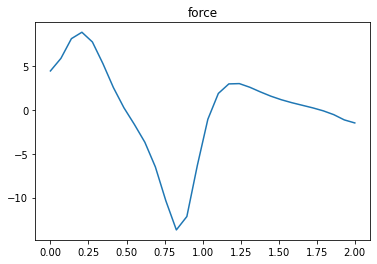

In [139]:
import matplotlib.pyplot as plt
plt.plot(np.linspace(0,2,N),x[-N:])
plt.title('force')

Text(0.5, 1.0, 'position')

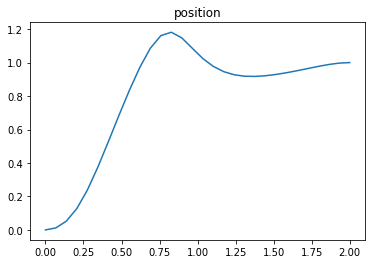

In [140]:
import matplotlib.pyplot as plt
position = []
for i in range(N):
    position.append(x[i*4])
plt.plot(np.linspace(0,2,N),position)
plt.title('position')

Text(0.5, 1.0, 'angle')

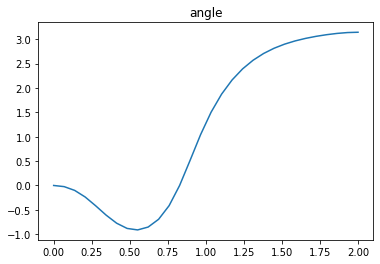

In [141]:
import matplotlib.pyplot as plt
position = []
for i in range(N):
    position.append(x[i*4+1])
plt.plot(np.linspace(0,2,N),position)
plt.title('angle')